In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

# Question 1.1

In [302]:
A = [1, -3.88098254, 5.64726905, -3.6515443, 0.88525793]
B = [0.4453368, -1.71110786, 2.49838163, -1.64272524, 0.41012833]

# Question 1.2

In [303]:
phi = A[1:] + B
print(phi)

[-3.88098254, 5.64726905, -3.6515443, 0.88525793, 0.4453368, -1.71110786, 2.49838163, -1.64272524, 0.41012833]


# Question 1.3

[0.9901592 +0.j         0.99472984+0.j         0.94804675+0.00054789j
 0.94804675-0.00054789j]
[0.95094101+0.27314275j 0.95094101-0.27314275j 0.99233108+0.j
 0.94806507+0.j        ]


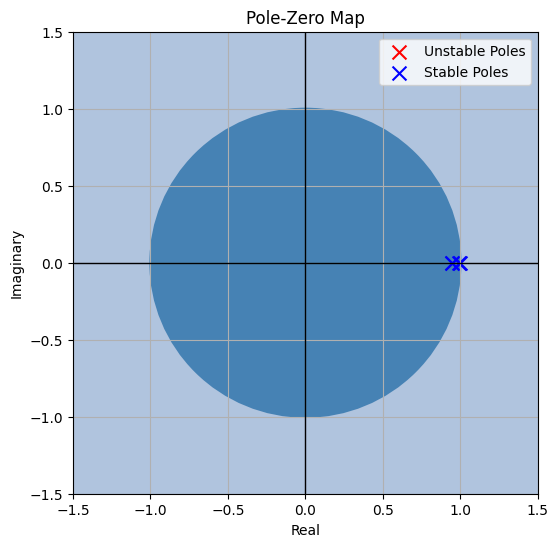

In [304]:
def pzmap(coefficients, bg_color="whitesmoke"):
    # Compute the roots (poles)
    poles = np.roots(coefficients)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Set background color
    ax.set_facecolor('lightsteelblue')  # Background color of the plot area

    # Plot unit circle for reference
    unit_circle = plt.Circle((0, 0), 1, color='steelblue', fill=True, linewidth=1.5)
    ax.add_patch(unit_circle)

    # Separate stable and unstable poles based on their magnitude
    stable_poles = poles[np.abs(poles) <= 1]  # Poles inside or on the unit circle
    unstable_poles = poles[np.abs(poles) > 1]  # Poles outside the unit circle

    # Plot unstable poles (red)
    plt.scatter(unstable_poles.real, unstable_poles.imag, marker='x', color='red', label='Unstable Poles', s=100)

    # Plot stable poles (blue)
    plt.scatter(stable_poles.real, stable_poles.imag, marker='x', color='blue', label='Stable Poles', s=100)

    # Set axis limits
    limit = max(1.5, np.max(np.abs(poles)) + 0.5)
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)

    # Draw axes
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)

    # Labels and title
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.title("Pole-Zero Map")
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

# Example polynomial: A (as defined earlier)
coefficients = A
print(np.roots(A))
print(np.roots(B))
# Call function with custom background color
pzmap(coefficients, bg_color="lightgray")


# Question 1.4

<>:37: SyntaxWarning: invalid escape sequence '\h'
<>:37: SyntaxWarning: invalid escape sequence '\h'
C:\Users\madsw\AppData\Local\Temp\ipykernel_16236\3809580888.py:37: SyntaxWarning: invalid escape sequence '\h'
  axs[1].plot(y_sim, label='Simulated $\hat{y}_t$', color='red', linestyle='-', linewidth=2)


[-1.19745846 -1.19745846 -1.19745846 -1.19745846  0.        ]


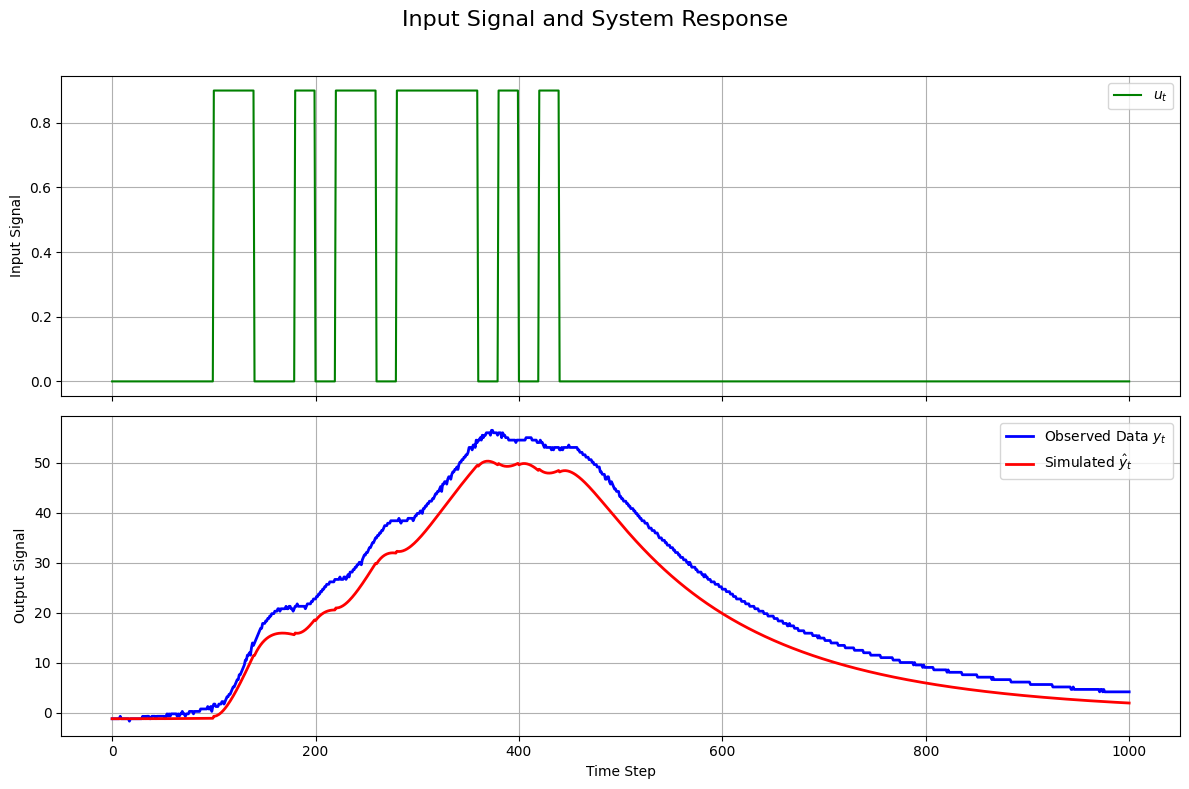

In [305]:
path = 'Assignment1_ObservationsAndInputs.txt'
df = pd.read_csv(path, sep=' ', header=None)

df= df.T  # Transpose the DataFrame
df.columns = ['y_t', 'u_t'] # rename columns
df.drop(index=1001,inplace=True)

u_data = df['u_t'].to_numpy()
y_data = df['y_t'].to_numpy()
def sim():
    y_sim = np.zeros_like(u_data)
    y_sim[:4] = y_data[:4]
    print(y_sim[:5])
    for t in range(4,len(u_data)):

        for i in range(1,len(A)):
            y_sim[t] -= A[i]*y_sim[t-i] 

        for i in range(0,len(B)):
            y_sim[t] += B[i]*u_data[t-i]

        y_sim += np.random.normal(0, 1e-10)
    return y_sim
y_sim = sim()
# Plot results
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
fig.suptitle("Input Signal and System Response", fontsize=16)

# Plot u(t)
axs[0].plot(u_data, label='$u_t$', color='green')
axs[0].set_ylabel('Input Signal')
axs[0].legend(loc='best')
axs[0].grid(True)

# Plot Observed vs Simulated Data
axs[1].plot(y_data, label='Observed Data $y_t$', color='blue', linewidth=2)
axs[1].plot(y_sim, label='Simulated $\hat{y}_t$', color='red', linestyle='-', linewidth=2)
axs[1].set_xlabel('Time Step')
axs[1].set_ylabel('Output Signal')
axs[1].legend(loc='best')
axs[1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Question 1.5

In [306]:
# Solve diophantine
def solve_diophantine(A,C,m):
    G = []
    S = C[:] + [0 for _ in range(len(A)-len(C))]

    for i in range(m):
        G.append(S[0])
        S = [S[j] - S[0] * A[j] for j in range(1, len(S))] + [0]

    S = S[:-1]
    return S, G

S, G = solve_diophantine(A,[1],m=1)
print('S =',S)
print('G =',G)

S = [3.88098254, -5.64726905, 3.6515443, -0.88525793]
G = [1]


# Question 1.6

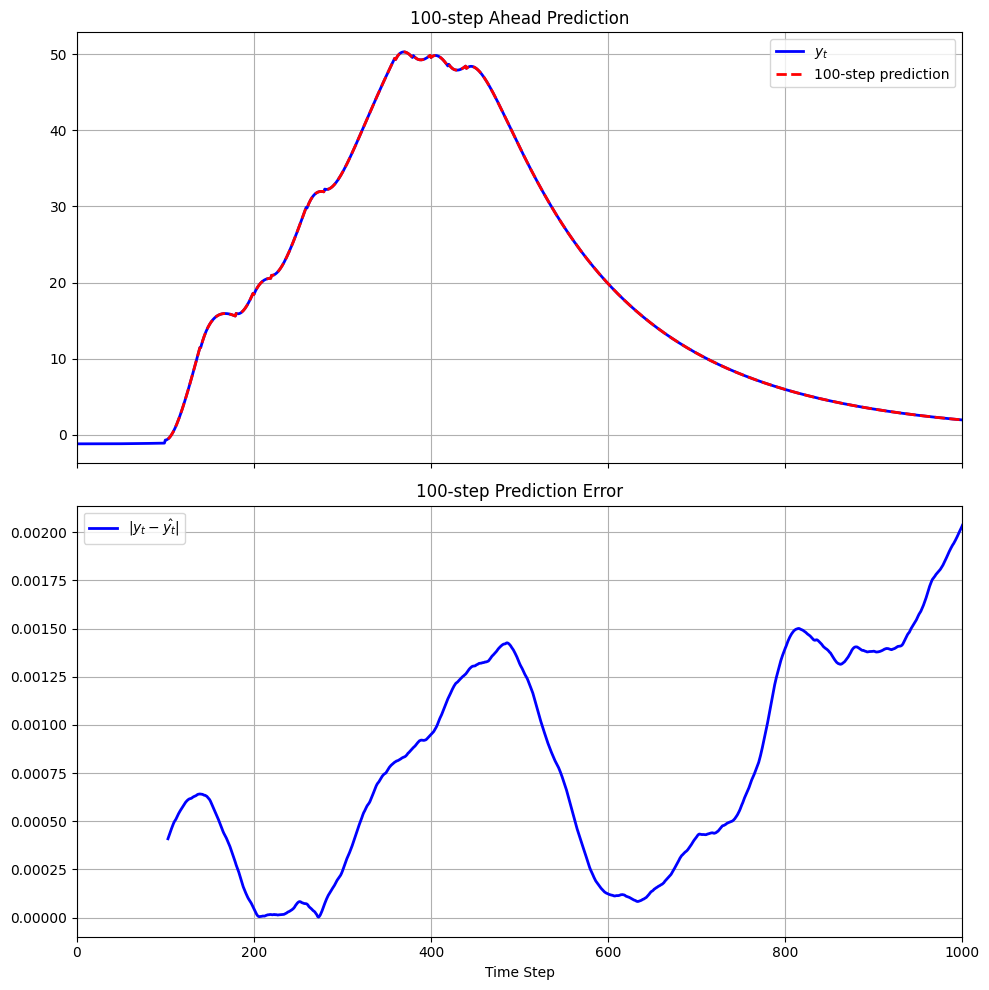

0.0007873172335937916


In [307]:
# Read data
path = 'Assignment1_ObservationsAndInputs.txt'
df = pd.read_csv(path, sep=' ', header=None)
df = df.T
df.columns = ['y_t', 'u_t']
df.drop(index=1001, inplace=True)

u_data = df['u_t'].to_numpy()
y_data = df['y_t'].to_numpy()

# Prediction function
def predict(y, u, A, B,step = 1):
    S, G = solve_diophantine(A, [1], m=step)
    n = len(S)-1
    N = len(y)-step

    B_times_G = np.convolve(G, B)  # Polynomial multiplication
    t_idx = []
    y_pred = []
    for t in range(n,N):
        BG_u = 0
        for i in range(len(B_times_G)):

            BG_u += B_times_G[i] * u[t+step-i]
        S_y = 0
        for i in range(len(S)):

            S_y += S[i] * y[t-i]

        y_pred.append(BG_u + S_y)
        t_idx.append(t+step)
    return y_pred, t_idx

# Model coefficients
A = [1, -3.88098254, 5.64726905, -3.6515443, 0.88525793]
B = [0.4453368, -1.71110786, 2.49838163, -1.64272524, 0.41012833]

# Use first 900 samples for initial data
y_pred, t_idx = predict(y_sim, u_data, A, B,step=100)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# First subplot: 100-step ahead prediction
axes[0].plot(y_sim, label=r'$y_t$',linewidth = 2,color ='blue')
axes[0].plot(t_idx, y_pred, label='100-step prediction',linestyle = 'dashed',linewidth = 2, color = 'red')
axes[0].set_title('100-step Ahead Prediction')
axes[0].set_xlim(0, 1000)
axes[0].set_xticklabels([])
axes[0].legend()
axes[0].grid()
# Second subplot: Prediction error
axes[1].plot(t_idx, np.abs(y_sim[t_idx] - y_pred), label=r'$|y_t-\hat{y_t}|$', linewidth = 2, color = 'blue')
axes[1].set_title('100-step Prediction Error')
axes[1].set_xlabel('Time Step')
axes[1].set_xlim(0, 1000)
axes[1].legend()
axes[1].grid()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

MAE = np.mean(np.abs(y_sim[t_idx] - y_pred))
print(MAE)

# Question 1.8

condition number of matrix
 1259958.2764125757
[ 0.714  0.392  0.087 -0.196  0.349 -0.179 -0.229 -0.066  0.439]
Est sigma^2 =  0.08161904645054752
[[ 0.001  -0.0007 -0.0003  0.0001 -0.0002 -0.0001  0.0002  0.0001 -0.0003]
 [-0.0007  0.0015 -0.0005 -0.0003  0.0005 -0.0005 -0.0003  0.0001  0.    ]
 [-0.0003 -0.0005  0.0015 -0.0007 -0.0003  0.0009 -0.0007 -0.0001  0.0002]
 [ 0.0001 -0.0003 -0.0007  0.0009  0.     -0.0004  0.0007 -0.0001  0.0001]
 [-0.0002  0.0005 -0.0003  0.      0.0088 -0.0086 -0.      0.      0.0002]
 [-0.0001 -0.0005  0.0009 -0.0004 -0.0086  0.0174 -0.0087 -0.0001  0.0002]
 [ 0.0002 -0.0003 -0.0007  0.0007 -0.     -0.0087  0.0173 -0.0085 -0.    ]
 [ 0.0001  0.0001 -0.0001 -0.0001  0.     -0.0001 -0.0085  0.0168 -0.0085]
 [-0.0003  0.      0.0002  0.0001  0.0002  0.0002 -0.     -0.0085  0.0088]]
theta_1 0.7142853980912778 > 0.06065650586127827 True
theta_2 0.39206383781906096 > 0.07595223263571221 True
theta_3 0.08678811884787882 > 0.07658415294441892 True
theta_4 0.195

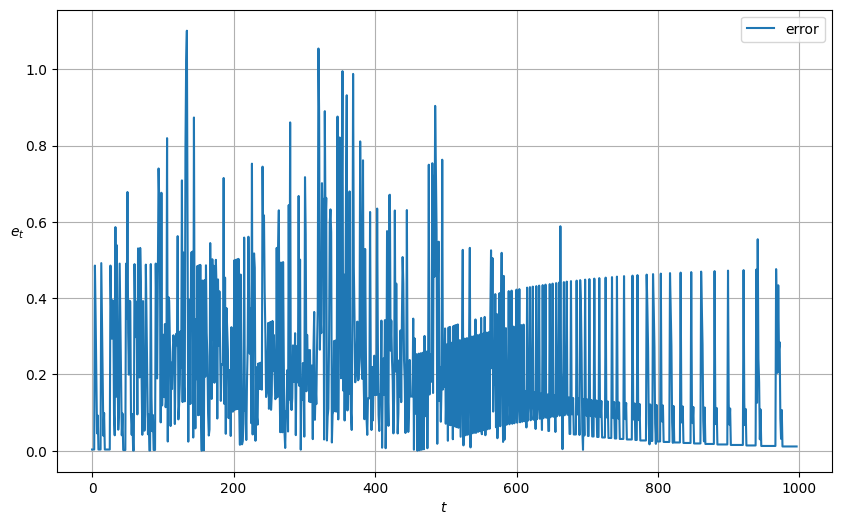

In [308]:
u_data = df['u_t'].to_numpy()
y_data = df['y_t'].to_numpy()

# ___ LSQ _____
X = [[y_data[i-1], y_data[i-2], y_data[i-3], y_data[i-4], 
      u_data[i], u_data[i-1],u_data[i-2],u_data[i-3],u_data[i-4]] for i in range(4, len(y_data))]
X = np.array(X)
Y = y_data[4:]

# solve LSQ
print('condition number of matrix\n',np.linalg.cond(X.T @ X))
theta = np.linalg.solve(X.T @ X, X.T @ Y)
print(np.round(theta,3))
y_est = X @ theta
sigma_est = np.sum((Y-y_est)**2)/(len(Y)-9)
print('Est sigma^2 = ',sigma_est)
P_theta = sigma_est * np.linalg.inv(X.T @ X)
print(np.round(P_theta,4))

alpha = 0.05  # Example significance level
quantile = t.ppf(1 - alpha / 2, len(Y)-9)

for i in range(9):
    print(f'theta_{i+1} {np.abs(theta[i])} > {quantile * np.sqrt(P_theta[i,i])} {np.abs(theta[i]) > quantile * np.sqrt(P_theta[i,i])}')

y_est = X @ theta

plt.figure(figsize=(10, 6))  # Optional: Set figure size
plt.plot(np.abs(Y-y_est), label=r'error')
plt.legend()
plt.xlabel(r'$t$')  # Ensure LaTeX rendering
plt.ylabel(r'$e_t$  ', rotation=0)  # Use LaTeX for consistency
plt.grid()
plt.show()





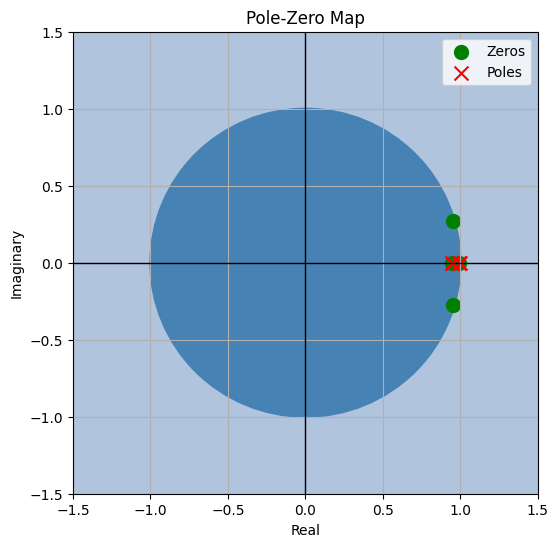

In [309]:
def pzmap_2(pole_coefficients, zero_coefficients, bg_color="whitesmoke"):
    # Compute the roots (poles and zeros)
    poles = np.roots(pole_coefficients)
    zeros = np.roots(zero_coefficients)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Set background color
    ax.set_facecolor(bg_color)  # Background color of the plot area

    # Plot unit circle for reference
    unit_circle = plt.Circle((0, 0), 1, color='steelblue', fill=True, linewidth=1.5)
    ax.add_patch(unit_circle)


    # Plot zeros (green)
    plt.scatter(zeros.real, zeros.imag, marker='o', color='green', label='Zeros', s=100)

    # Plot unstable poles (red)
    plt.scatter(poles.real, poles.imag, marker='x', color='red', label='Poles', s=100)

    # Set axis limits
    limit = max(1.5, np.max(np.abs(poles)) + 0.5)
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)

    # Draw axes
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)

    # Labels and title
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.title("Pole-Zero Map")
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()
A = [1, -3.88098254, 5.64726905, -3.6515443, 0.88525793]
B = [0.4453368, -1.71110786, 2.49838163, -1.64272524, 0.41012833]
pzmap_2(A, B, bg_color="lightsteelblue")

# Question 1.9

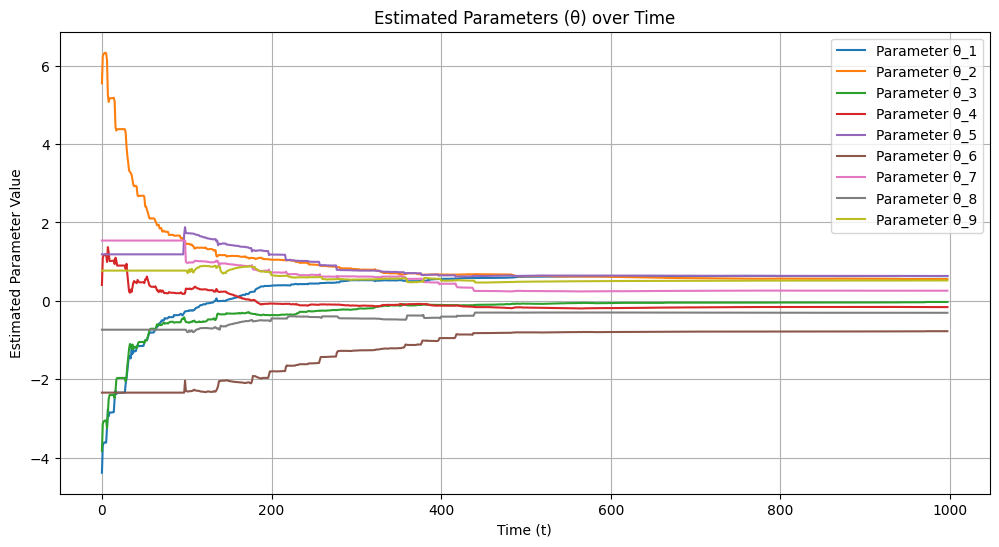

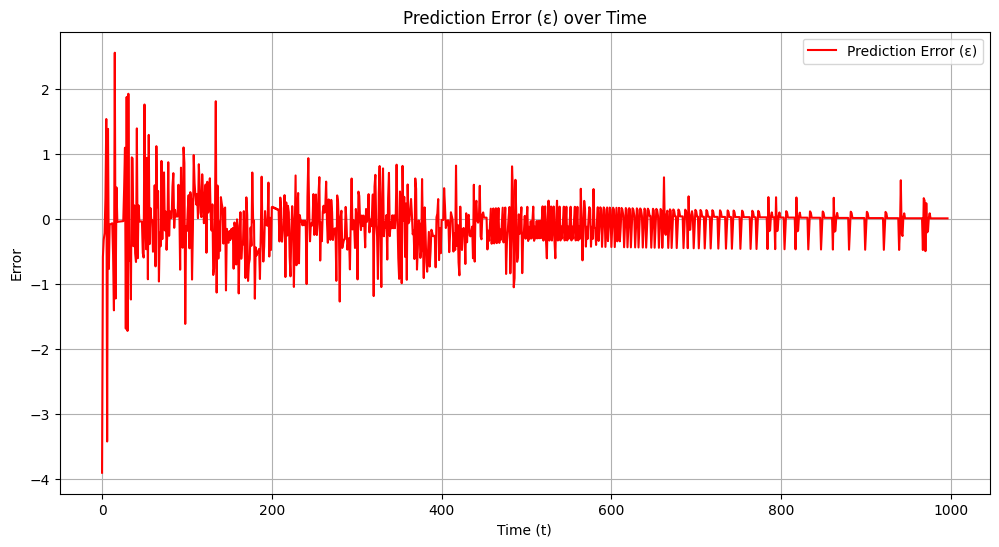

[ 0.63   0.556 -0.029 -0.159  0.634 -0.775  0.258 -0.305  0.52 ]


In [310]:
N = len(y_data)-4

phi = np.array([[y_data[i-1], y_data[i-2], y_data[i-3], y_data[i-4], 
                 u_data[i], u_data[i-1],u_data[i-2],u_data[i-3],u_data[i-4]] for i in range(4,len(y_data))])

theta = np.zeros([N+1,9])
# initial theta: true params + noise
theta[0] = A[1:] + B #true params
np.random.seed(33)
theta[0] += 2*(np.random.random(size=9) - 0.5) # add noise

# initial covarience of params
P = np.zeros([N+1,9,9])
P[0] = np.identity(9)

epsilon = np.zeros(N)
for i in range(N):
    # predict and find error
    epsilon[i] = y_data[i+4] - np.dot(phi[i],theta[i])

    # calculate Kalman gain
    s = 1 + phi[i][None,:] @ P[i] @ phi[i][:,None]
    K = (P[i] @ phi[i][:,None]) / s

    # update params
    theta[i+1] = theta[i] + (K*epsilon[i]).squeeze()
    P[i+1] = P[i] - K @ s @ K.T

# Plot parameter estimates
plt.figure(figsize=(12, 6))

for i in range(9):
    plt.plot(theta[:, i], label=f'Parameter θ_{i+1}')

plt.title('Estimated Parameters (θ) over Time')
plt.xlabel('Time (t)')
plt.ylabel('Estimated Parameter Value')
plt.legend()
plt.grid(True)

# Plot prediction errors
plt.figure(figsize=(12, 6))
plt.plot(epsilon, label='Prediction Error (ε)', color='red')
plt.title('Prediction Error (ε) over Time')
plt.xlabel('Time (t)')
plt.ylabel('Error')
plt.grid(True)
plt.legend()

plt.show()

print(np.round(theta[-1],3))